#**Deep Learning Homework 3: Convolutional Neural Networks**

### MSc Computer Science, Data Science, Cybersecurity @UniPD
### 2nd semester - 6 ECTS
### Prof. Nicolò Navarin & Prof. Alessandro Sperduti
---
In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the CIFAR-10 dataset. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

##Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

###Load dataset:
### Load Data: CIFAR-10 dataset


We will use the CIFAR-10 dataset.The dataset consists of 60000 images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Each sample is a 32x32 pixels color image, associated with a label from 10 classes:

```
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
```

Each pixel intensity is represented by a `uint8` (byte) from 0 to 255.
We will divide the dataset in training, testing and validation set. As you already know, the training set will be used to train the model, the validation set will be used to perform model selection and finally, the test set will be used to asses the performance of deep network.

Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in grey scale image is just one and in color images is 3). Therefore, if you are using grayscale images use [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims#:~:text=Used%20in%20the%20notebooks,-Used%20in%20the&text=This%20operation%20is%20useful%20to,to%20a%20tensor%20of%20scalars) to transform each image from a matrix to a 3-dimensional tensor. Finally, we have to normalize the input data.

In [2]:
cifar_10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = (
    cifar_10.load_data()) # The dataset is already divede in test and training

# We extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]


170508288/170498071 [==============================] - 6s 0us/step


Let's take a look at a sample of the images in the dataset:

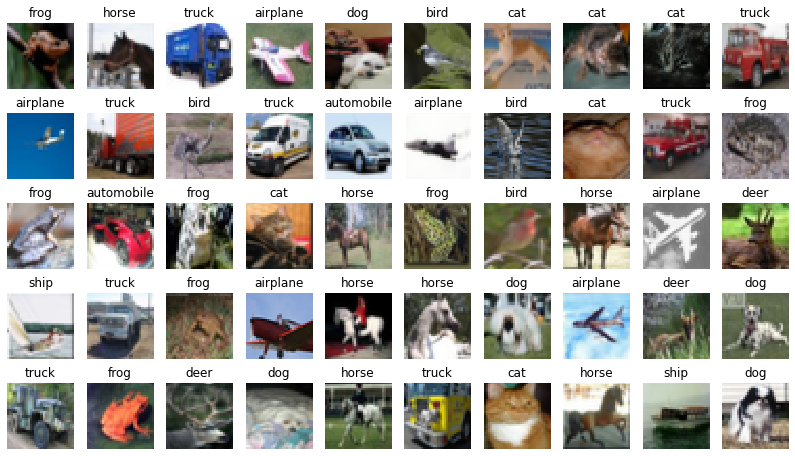

In [3]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index][0]])
plt.show()

### [TO COMPLETE] Input Normalization:

When using Gradient Descent, it is usually a good idea to ensure that all the features have a similar scale. Try to standardize the pixel values.

In [4]:
#[TO COMPLETE]: define X_train_scaled, X_valid_scaled and X_test_scaled, the sets that contains 
#Hint: For each feature (pixel intensity), you must subtract the mean() of that 
#feature (across all instances, so use axis=0) and divide by its standard 
#deviation (std(), again axis=0)

X_train_mean = np.mean(X_train, axis = 0);
X_train_std = np.std(X_train, axis = 0);

X_train = (X_train - X_train_mean)/X_train_std;#[TO COMPLETE]
X_valid = (X_valid - X_train_mean)/X_train_std;#[TO COMPLETE]
X_test = (X_test - X_train_mean)/X_train_std;#[TO COMPLETE]


#Add one dimension to manage the channel if you are using grayscale images.
#X_train=tf.expand_dims(X_train, 3) 
#X_valid=tf.expand_dims(X_valid, 3) 
#X_test=tf.expand_dims(X_test,3)

#Make sure you compute the means and standard deviations on the training set,
#and use these statistics to scale the training set, the validation set and the
# test set

###Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [5]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])


Print the model summary

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 10)                81930     
                                                                 
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the parameter sharing techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model.

In [7]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
352/352 [==============================] - 12s 10ms/step - loss: 1.4745 - accuracy: 0.4847 - val_loss: 1.2711 - val_accuracy: 0.5544
Epoch 2/10
352/352 [==============================] - 3s 9ms/step - loss: 1.1713 - accuracy: 0.5951 - val_loss: 1.1625 - val_accuracy: 0.5946
Epoch 3/10
352/352 [==============================] - 3s 8ms/step - loss: 1.0548 - accuracy: 0.6394 - val_loss: 1.0932 - val_accuracy: 0.6194
Epoch 4/10
352/352 [==============================] - 3s 8ms/step - loss: 0.9825 - accuracy: 0.6628 - val_loss: 1.0796 - val_accuracy: 0.6304
Epoch 5/10
352/352 [==============================] - 3s 9ms/step - loss: 0.9234 - accuracy: 0.6839 - val_loss: 1.0586 - val_accuracy: 0.6434
Epoch 6/10
352/352 [==============================] - 3s 8ms/step - loss: 0.8841 - accuracy: 0.6975 - val_loss: 1.0372 - val_accuracy: 0.6476
Epoch 7/10
352/352 [==============================] - 3s 9ms/step - loss: 0.8453 - accuracy: 0.7088 - val_loss: 1.0229 - val_accuracy: 0.6516
Epoc

Plot the loss and the accuracy trends for the training and validation set. Then, compute the result on the test set.

313/313 - 1s - loss: 1.0434 - accuracy: 0.6463 - 953ms/epoch - 3ms/step
accuracy: 64.63%


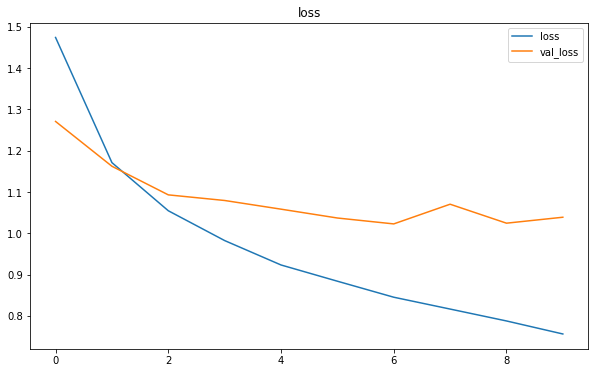

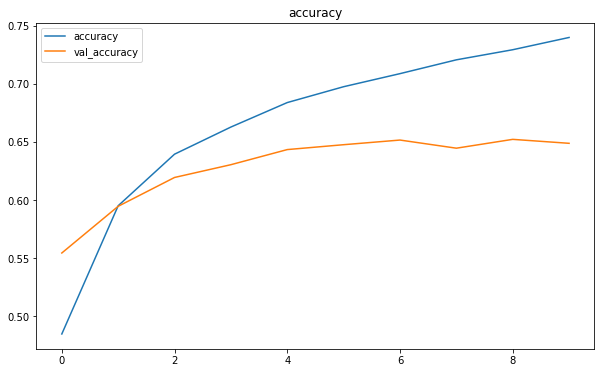

In [8]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'], label='loss')
  plt.plot(history.epoch,history.history['val_loss'],label='val_loss')
  plt.title('loss')
  plt.legend()
  
def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'],label='accuracy')
  plt.plot(history.epoch,history.history['val_accuracy'],label='val_accuracy')
  plt.title('accuracy')
  plt.legend()
  
plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



###Visualize Weights

An interesting thing to do is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

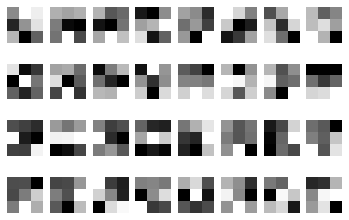

In [9]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

### [TO COMPLETE] Deep CNN
Let's consider a deeper model, more precily in this exercise we consider a model composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 
* One 2D convolutional layer with kernel size 2x2 and 16 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function


In [10]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        2064      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

[TO COMPLETE] Explain in this cell: 

1.   how the number of parameters on each of the two Conv2D layers is determined;
2.   the reasons why the two considered convolutional layers have a different number of parameters.

Answers:


1.   [TO COMPLETE] Answer to question 1:

 The number of Parameters of the two Conv2D layers is determinated according to:
 [#filters in the previous layer x (current layer size) + 1 (the bias)] x #filters in output.

 In the first one we have: [3 x (3 x 3)+1] x 32 = 896

 In the second one we have: [32 x (2 x 2)+1] x 16 = 2064

2.   [TO COMPLETE] Answer to question 2:

 The reason why the two Conv2D layers have different numbers of parameters is that the first layer has size of (3 x 3), while the second has size of (2 x 2), also each layer has a different number of filters in output, 32 the first one, while 16 the second one.

Let's now train our deep CNN.

Epoch 1/10
352/352 [==============================] - 4s 10ms/step - loss: 1.5962 - accuracy: 0.4347 - val_loss: 1.3339 - val_accuracy: 0.5304
Epoch 2/10
352/352 [==============================] - 3s 9ms/step - loss: 1.2708 - accuracy: 0.5529 - val_loss: 1.1866 - val_accuracy: 0.5866
Epoch 3/10
352/352 [==============================] - 3s 8ms/step - loss: 1.1578 - accuracy: 0.5938 - val_loss: 1.1073 - val_accuracy: 0.6120
Epoch 4/10
352/352 [==============================] - 3s 9ms/step - loss: 1.0830 - accuracy: 0.6224 - val_loss: 1.0778 - val_accuracy: 0.6224
Epoch 5/10
352/352 [==============================] - 3s 8ms/step - loss: 1.0387 - accuracy: 0.6367 - val_loss: 1.0587 - val_accuracy: 0.6350
Epoch 6/10
352/352 [==============================] - 3s 9ms/step - loss: 1.0060 - accuracy: 0.6508 - val_loss: 1.0443 - val_accuracy: 0.6414
Epoch 7/10
352/352 [==============================] - 3s 8ms/step - loss: 0.9772 - accuracy: 0.6614 - val_loss: 1.0256 - val_accuracy: 0.6430
Epoch

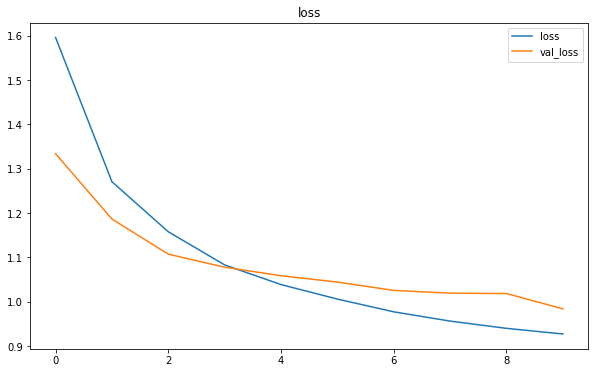

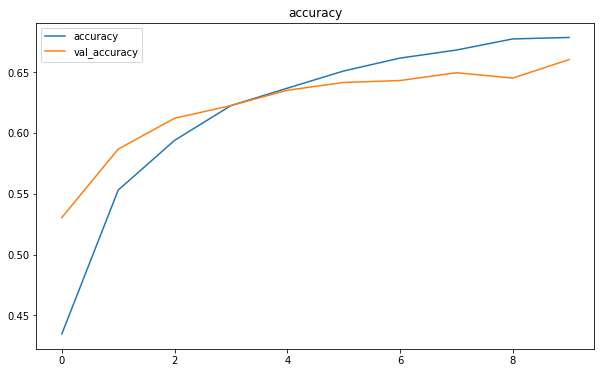

In [11]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

## [TO COMPLETE] Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

**[TO COMPLETE]**: Your task is to modify some of the hyper-parameters of the previous exercise's network and compare the results. At least one of the models you try should have an improvement in the test set results (generalization) over the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells at the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

In [12]:
#[TO COMPLETE]
#CHANGE NUMBER OF LAYERS AND INCREASED THE NUMBER OF PARAMETERS
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=128, kernel_size=[4,4], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(filters=128, kernel_size=[3,3], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 128)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 128)       262272    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 6, 6, 128)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)        

Epoch 1/10
352/352 [==============================] - 12s 31ms/step - loss: 1.5640 - accuracy: 0.4305 - val_loss: 1.2425 - val_accuracy: 0.5724
Epoch 2/10
352/352 [==============================] - 11s 30ms/step - loss: 1.1822 - accuracy: 0.5836 - val_loss: 1.0132 - val_accuracy: 0.6422
Epoch 3/10
352/352 [==============================] - 10s 30ms/step - loss: 1.0227 - accuracy: 0.6403 - val_loss: 0.9204 - val_accuracy: 0.6762
Epoch 4/10
352/352 [==============================] - 11s 30ms/step - loss: 0.9275 - accuracy: 0.6752 - val_loss: 0.8402 - val_accuracy: 0.7140
Epoch 5/10
352/352 [==============================] - 10s 29ms/step - loss: 0.8639 - accuracy: 0.6983 - val_loss: 0.8177 - val_accuracy: 0.7264
Epoch 6/10
352/352 [==============================] - 11s 30ms/step - loss: 0.8129 - accuracy: 0.7178 - val_loss: 0.7496 - val_accuracy: 0.7434
Epoch 7/10
352/352 [==============================] - 11s 30ms/step - loss: 0.7665 - accuracy: 0.7313 - val_loss: 0.7360 - val_accuracy:

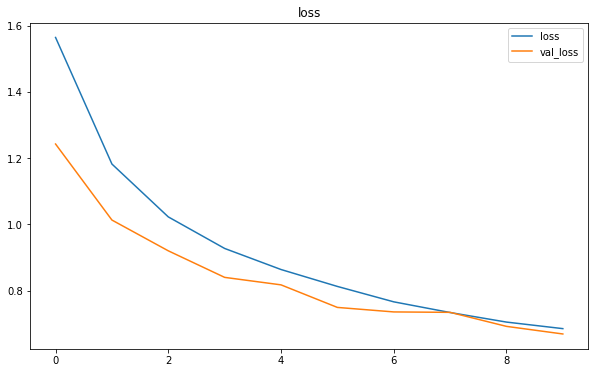

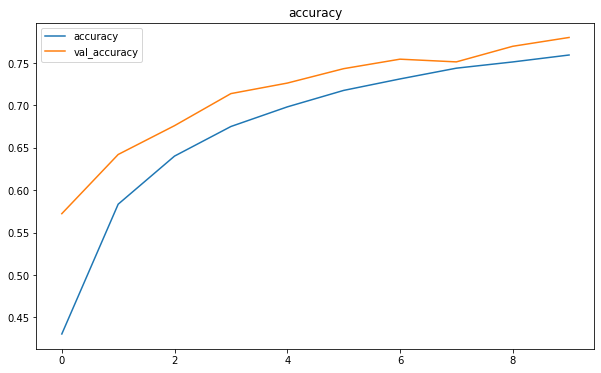

In [13]:
#[TO COMPLETE]
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

### [TO COMPLETE] Example of tests discussion
The best model that I found is the same the Professor give us, but with three Conv2D layers, the first with 128 filters and a kernel size of 3x3, the second layer with 128 filters and a kernel size of 4x4 and the last layer with 128 filters and a kernel size of 3x3. After the second and the third layer there are two Dropout layers. So I started from the model provided by the professor and add some layers, increasing the numbers of filters.[TO COMPLETE]

The achieved accuracy in the test set is 77.26%[TO COMPLETE]

Discussion:
[TO COMPLETE]

The model has way more parameters than the initial one, so it is reasonable it performs better than the previous one. The Dropout layers according to what I found on Github (https://github.com/christianversloot/machine-learning-articles/blob/main/what-is-dropout-reduce-overfitting-in-your-neural-networks.md) prevents the overfitting of my model. The results are good, but in my opinion it could be better if we train it for more epochs and also decrease the batch size (a.e. epochs = 20, batch size = 64, accuracy on Test Set is around 78%). Moreover, the results are not over 90% of accuracy given the fact that the dataset is full of several different immages (from machines to animals), so it is a difficult dataset to classify for a simple model.

Besides, I tested also other models: 
* Same structure of the model given by the Professor, but Adamax as Optimizer.

 Accuracy on Test Set = 61.03%
* Same structure of the model given by the Professor, but $tanh$ as Activation functions of the hidden layers.

 Accuracy on Test Set = 66.04%
* Same structure of the model given by the Professor, but 100 epochs for training. 

 Accuracy on Test Set = 68.88% (Overfitting)

* Same structure of the model given by the Professor, but batch size = 64.

 Accuracy on Test Set = 67.13%

* Same structure of the model given by the Professor, but only one pooling layer after the Conv2D layers.

 Accuracy on Test Set = 64.37%


Discussion:
[TO COMPLETE]

The first model has the Adamax optimizer, the model does not overfit, but it gets the lower accuracy on the Test Set with the models I tested.

The second model has $tanh$ as activation function of the hidden layers, the model does not overfit even in this case and it performs slightly better then the given model.

The third model has 100 epochs as parameters and in this case the model clearly overfits even if it works quite good on the test set.

The fourth model has batch size = 64. In this case the model is the best one (taking into account the overfitting problem and the accuracy on the Test Set).

The fifth model has only one pooling layer and the accuracy on the Test Set is lower with respect the initial model.

To conclude, I think that increasing the number of parameters, the epochs could help the model to perform better on this dataset.

Finally, before the final compilation I tried to use the gray channel and with the same best model that I found here I reached an accuracy around 73.76% on the Test Set, so I decided to manage the three channels for RGB images.
